# Animal Sleep

Some animals, such as elephants, sleep only 3-4 hours a night, while others, like bats, can sleep up to 20 hours.

Is there a relationship between sleep duration and body mass? Is a species' diet correlated with sleep time?

The file `animal-sleep.csv` provides data on the average sleep duration of 77 animal species, along with their average body mass in kilograms.

In [4]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-sleep.csv' and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-sleep.csv')
df.head()

,animal,diet,sleep,mass
0,african elephant,herbivore,3.3,6654.000
1,african giant pouched rat,omnivore,8.3,1.000
2,african striped mouse,herbivore,8.7,0.044
3,arctic fox,carnivore,12.5,3.380
4,arctic ground squirrel,omnivore,16.6,0.920


Text(0, 0.5, 'hours of sleep per day')

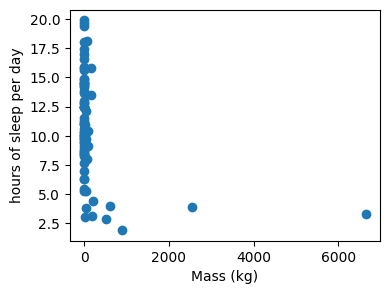

In [10]:
plt.figure(figsize=(4, 3))
plt.scatter(df['mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')

We see that the mass data exhibits a strong right skew with a long tail. A log transformation can convert an exponential relationship into a linear one, making it easier to model with linear regression.

In [11]:
import math
df['log10_mass'] = df['mass'].apply(math.log10)  # apply the function to each element
df.head()

,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
2,african striped mouse,herbivore,8.7,0.044,-1.356547
3,arctic fox,carnivore,12.5,3.380,0.528917
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212


Below is code for plotting the data using the log scale.

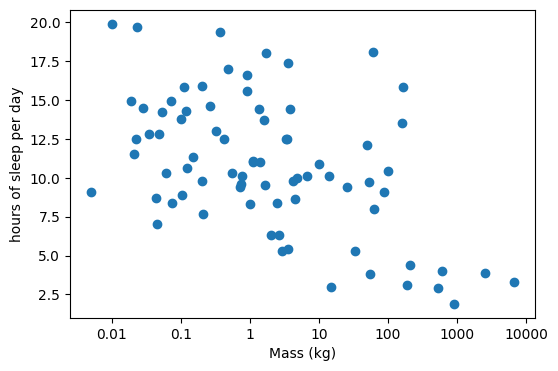

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.show()

### Project Ideas

- Model the relationship between `log10_mass` and hours of `sleep`.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

- Visualize the data and their best-fit lines on a single plot with distinct colors and symbols for each `diet` category, or use separate plots if more suitable.

- Explore and propose mechanisms that could explain the results, potentially involving additional research.

LinearModel():
Slope: -1.6149691733776594
Intercept: 11.217396810788516
R-squared: 0.26432361005128435


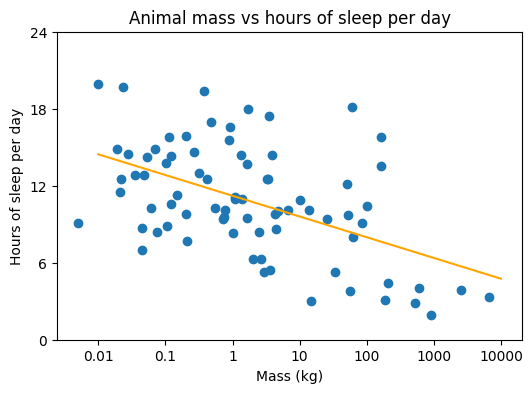

In [44]:
# Log10_mass and percentage of day spent asleep

plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.title("Animal mass vs hours of sleep per day")
plt.xlabel("Mass (kg)")
plt.ylabel("Hours of sleep per day")
plt.ylim([0, 24])
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.yticks([0, 6, 12, 18, 24])


mass_sleeppc = LinearModel()
mass_sleeppc.fit(df['log10_mass'], df['sleep'])
mass_sleeppc.predict(df['log10_mass'])
mass_sleeppc.plot_model(-2, 4, color="orange")
mass_sleeppc.print_model_info()


In [64]:
# Diet categories

plt.figure(figsize=(6,4))

# I need to convert the diet categories into numbers and then
df['diet_number'] = df['diet'].map({"omnivore": 0, "herbivore" : 1, "carnivore" : 2})

omnivores = df.query('diet_number == 0')
herbivores = df.query('diet_number == 1')
carnivores = df.query('diet_number == 2')

<Figure size 600x400 with 0 Axes>

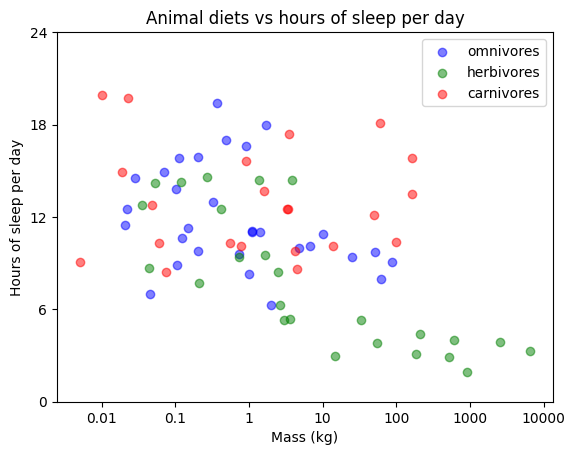

In [68]:
# Dietary patterns plotted together
plt.title("Animal diets vs hours of sleep per day")
plt.xlabel("Mass (kg)")
plt.ylabel("Hours of sleep per day")
plt.ylim([0, 24])
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.yticks([0, 6, 12, 18, 24])
plt.scatter(omnivores['log10_mass'], omnivores['sleep'], alpha=0.5, color='b')
plt.scatter(herbivores['log10_mass'], herbivores['sleep'], alpha=0.5, color='g')
plt.scatter(carnivores['log10_mass'], carnivores['sleep'], alpha=0.5, color='r')

plt.legend(["omnivores", "herbivores", "carnivores"])

Text(0, 0.5, 'Hours slept per day')

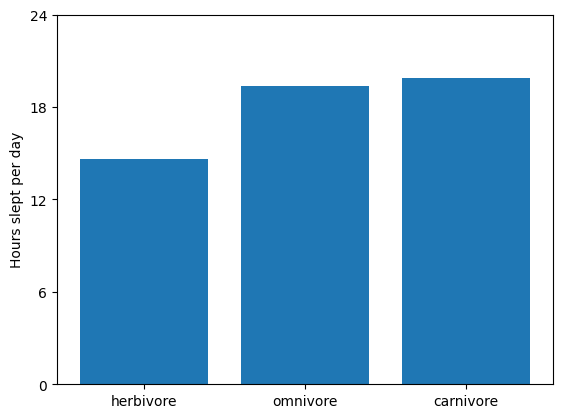

In [90]:
plt.bar(df['diet'], df['sleep'])
plt.ylim([0, 24])
plt.yticks([0, 6, 12, 18, 24])
plt.ylabel("Hours slept per day")

LinearModel():
Slope: -2.2408355966298785
Intercept: 9.596484459635365
R-squared: 0.6255104280867234


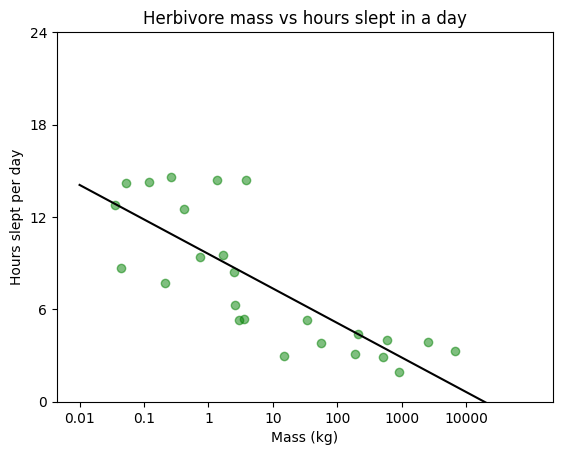

In [87]:
plt.scatter(herbivores['log10_mass'], herbivores['sleep'], alpha=0.5, color='g')
plt.title("Herbivore mass vs hours slept in a day")
plt.xlabel("Mass (kg)")
plt.ylabel("Hours slept per day")
plt.ylim([0, 24])
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.yticks([0, 6, 12, 18, 24])

herbivoremass_sleep = LinearModel()
herbivoremass_sleep.fit(herbivores['log10_mass'], herbivores['sleep'])
herbivoremass_sleep.plot_model(-2, 5, color='k')
herbivoremass_sleep.print_model_info()

LinearModel():
Slope: -1.0841960083999436
Intercept: 11.662140158348944
R-squared: 0.10944681716489979


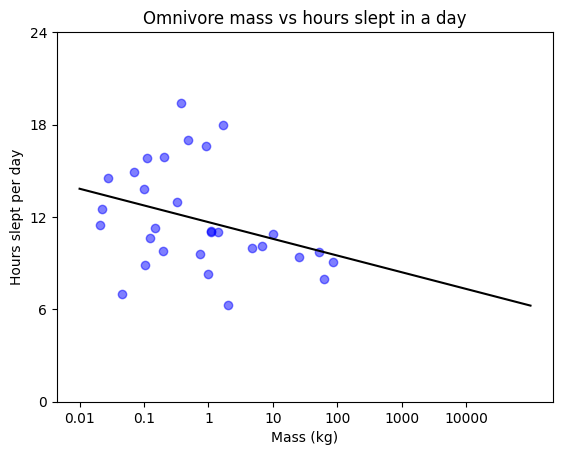

In [89]:
plt.scatter(omnivores['log10_mass'], omnivores['sleep'], alpha=0.5, color='b')
plt.title("Omnivore mass vs hours slept in a day")
plt.xlabel("Mass (kg)")
plt.ylabel("Hours slept per day")
plt.ylim([0, 24])
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.yticks([0, 6, 12, 18, 24])

omnivoremass_sleep = LinearModel()
omnivoremass_sleep.fit(omnivores['log10_mass'], omnivores['sleep'])
omnivoremass_sleep.plot_model(-2, 5, color='k')
omnivoremass_sleep.print_model_info()

LinearModel():
Slope: -0.14090226025203156
Intercept: 12.99704850696372
R-squared: 0.003186503413273978


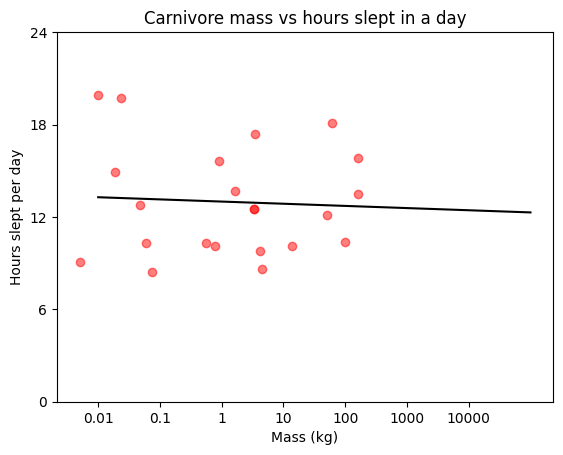

In [91]:
plt.scatter(carnivores['log10_mass'], carnivores['sleep'], alpha=0.5, color='r')
plt.title("Carnivore mass vs hours slept in a day")
plt.xlabel("Mass (kg)")
plt.ylabel("Hours slept per day")
plt.ylim([0, 24])
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.yticks([0, 6, 12, 18, 24])

carnivoremass_sleep = LinearModel()
carnivoremass_sleep.fit(carnivores['log10_mass'], carnivores['sleep'])
carnivoremass_sleep.plot_model(-2, 5, color='k')
carnivoremass_sleep.print_model_info()

In [ ]:
# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):